In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [19]:
import numpy as np
from data_pipeline import load_dataset
from model_builders import build_model
from training import train_softmax_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from evaluate import plot_acc_loss

In [7]:
X, y, label_map = load_dataset("../data/Brain Cancer Dataset/Training", add_noise=True)
X = np.repeat(X[..., np.newaxis], 3, axis=-1)  # Convert to RGB by repeating the single channel
num_classes = len(label_map)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

# remap y to 0-based indexing
inverse_label_map = {v: i for i, v in enumerate(sorted(label_map.values()))}

y_train = np.array([inverse_label_map[y] for y in y_train])
y_val = np.array([inverse_label_map[y] for y in y_val])

In [14]:
model = build_model("VGG16", num_classes=num_classes, classifier_head="softmax")

In [15]:
model, history = train_softmax_model(model, X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


2025-06-25 12:32:41.070714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


115/115 ━━━━━━━━━━━━━━━━━━━━ 29s 244ms/step - accuracy: 0.4457 - loss: 1.2814 - val_accuracy: 0.8370 - val_loss: 0.5714
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 234ms/step - accuracy: 0.7392 - loss: 0.6661 - val_accuracy: 0.8479 - val_loss: 0.4603
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 231ms/step - accuracy: 0.7946 - loss: 0.5485 - val_accuracy: 0.8545 - val_loss: 0.4302
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 231ms/step - accuracy: 0.8196 - loss: 0.4804 - val_accuracy: 0.8501 - val_loss: 0.4263
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 26s 229ms/step - accuracy: 0.8407 - loss: 0.4222 - val_accuracy: 0.8775 - val_loss: 0.3640


In [18]:
y_val_cat = to_categorical(y_val, num_classes=num_classes)
val_loss, val_acc = model.evaluate(X_val, y_val_cat, verbose=0)
print(f"\nValidation Accuracy: {val_acc:.4f}")


Validation Accuracy: 0.9029


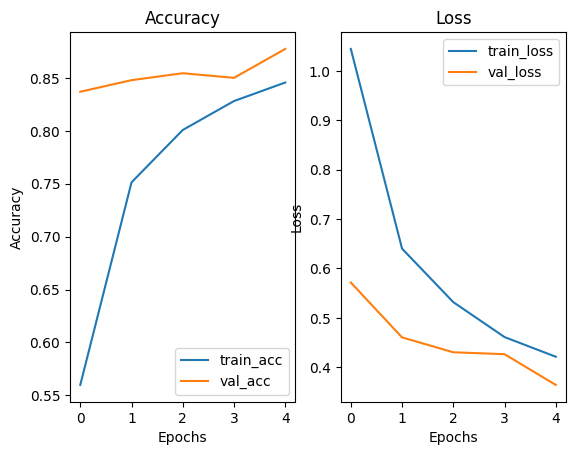

In [20]:
plot_acc_loss(history)

In [25]:
from training import train_with_cv

y = np.array([inverse_label_map[y] for y in y])

build_fn = lambda: build_model("VGG16", num_classes=num_classes, classifier_head="softmax")

model, scores = train_with_cv(build_fn, X, y, classifier_head="softmax", folds=10, epochs=5, batch_size=32)

Fold 1/10
Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 32s 236ms/step - accuracy: 0.4590 - loss: 1.2862 - val_accuracy: 0.0885 - val_loss: 1.5170
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 228ms/step - accuracy: 0.7461 - loss: 0.6474 - val_accuracy: 0.6508 - val_loss: 0.8291
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 230ms/step - accuracy: 0.7814 - loss: 0.5453 - val_accuracy: 0.6021 - val_loss: 0.8820
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 229ms/step - accuracy: 0.8251 - loss: 0.4633 - val_accuracy: 0.6916 - val_loss: 0.6967
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 231ms/step - accuracy: 0.8406 - loss: 0.4173 - val_accuracy: 0.7772 - val_loss: 0.5518
Fold 1 Accuracy: 0.8619
Fold 2/10
Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 253ms/step - accuracy: 0.4843 - loss: 1.2496 - val_accuracy: 0.0418 - val_loss: 1.6406
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 230ms/step - accuracy: 0.7528 - loss: 0.6173 - val_accuracy: 0.4912 - val_loss: 1.0658
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 229

In [27]:
print(scores)
print(f"Mean Acc: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

[0.8618881106376648, 0.809440553188324, 0.8056042194366455, 0.8003502488136292, 0.8511383533477783, 0.8406304717063904, 0.8476357460021973, 0.8528896570205688, 0.8266199827194214, 0.8406304717063904]
Mean Acc: 0.8337 ± 0.0207


In [28]:
#check for resnet
resnet_fn = lambda: build_model("ResNet101", num_classes=num_classes, classifier_head="softmax")
_, resnet_scores = train_with_cv(resnet_fn, X, y, classifier_head="softmax", folds=5, epochs=5, batch_size=32)

Fold 1/5
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 331ms/step - accuracy: 0.5466 - loss: 1.6101 - val_accuracy: 0.2648 - val_loss: 2.0367
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 31s 266ms/step - accuracy: 0.6643 - loss: 1.2180 - val_accuracy: 0.4289 - val_loss: 1.6411
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 31s 269ms/step - accuracy: 0.7144 - loss: 0.9180 - val_accuracy: 0.4147 - val_loss: 1.6319
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 31s 270ms/step - accuracy: 0.7374 - loss: 0.7806 - val_accuracy: 0.6028 - val_loss: 1.0417
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 31s 265ms/step - accuracy: 0.7776 - loss: 0.6691 - val_accuracy: 0.4562 - val_loss: 1.5048
Fold 1 Accuracy: 0.7454
Fold 2/5
Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 47s 329ms/step - accuracy: 0.5128 - loss: 1.4813 - val_accuracy: 0.6400 - val_loss: 0.8935
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 31s 268ms/step - accuracy: 0.6701 - loss: 1.0235 - val_accuracy: 0.5022 - val_loss: 1

In [29]:
print(scores)
print(f"Mean acc: {np.mean(scores) :.4f} ± {np.std(scores):.4f}")

[0.8618881106376648, 0.809440553188324, 0.8056042194366455, 0.8003502488136292, 0.8511383533477783, 0.8406304717063904, 0.8476357460021973, 0.8528896570205688, 0.8266199827194214, 0.8406304717063904]
Mean acc: 0.8337 ± 0.0207
